## Data Visualization: Peers View
***

### Datasets:
#### TIF District Programming - 2017-2021 (tif.csv)
- **Source:** City of Chicago via the [Chicago Data Portal](https://data.cityofchicago.org/Community-Economic-Development/TIF-District-Programming-2017-2021/ycd5-punx/about_data)
- **Description:** Provided by the City of Chicago Office of Budget and Management, this dataset compiles financial data from Tax Increment Financing (TIF) districts, covering the years 2017 through their planned expiration. It includes estimated fund balances, project expenditures, and revenue projections based on property values within each TIF district. TIF districts are designated areas where property tax revenues are earmarked for specific development projects, aimed at revitalizing underdeveloped areas and stimulating economic growth.
-**Licensing and Attribution:**
    - Terms of Use: “This site provides applications using data that has been modified for use from its original source, www.cityofchicago.org, the official website of the City of Chicago.  The City of Chicago makes no claims as to the content, accuracy, timeliness, or completeness of any of the data provided at this site.  The data provided at this site is subject to change at any time.  It is understood that the data provided at this site is being used at one’s own risk.”

-**File Size:** 732 KB
-**Data Characteristics:**
    - 8 Columns, 6,663 Rows
    - Field Names: TIF ID, TIF Name, Time Period, Type, Description, Amount, Designation Date, Expiration Date

#### TIF Boundaries (tif_boundaries.geojson)
- **Source:** City of Chicago via the [Chicago Data Portal](https://data.cityofchicago.org/Community-Economic-Development/TIF-Boundaries/ku9w-h8e9)
- **Description:** Created by Thomas Applegate, this data source contains information Tax Increment Financing (TIF) district boundaries in Chicago. The data can be viewed on the Chicago Data Portal with a web browser. However, to view or use the files outside of a web browser, you will need to use compression software and special GIS software, such as ESRI ArcGIS (shapefile) or Google Earth (KML or KMZ), is required.
-**Licensing and Attribution:**
    - Terms of Use: Same terms of use as the TIF District Programming Dataset.

-**File Size:** 3.8 MB
-**Data Characteristics:**
    - 21 Columns, 121 Rows
    - Field Names: sbif, name, shape_area, show, objectid_1, name_trim, wards_2023, ref, approval_d, objectid, fid_1, shape_leng, comm_area, objectid_2, use, repealed_d, type, shape_le_1, ind, expiration, geometry


In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import random

In [2]:
# As always, gotta read in the dataset
df = pd.read_csv('data/tif.csv')

In [3]:
print(df.dtypes)

TIF Number          object
TIF Name            object
Time Period         object
Type                object
Description         object
Amount               int64
Designation Date    object
Expiration Date     object
dtype: object


At this point, I have realized that it is very import to look at the datatype of the columns. For my own preferences, I am opting to format the Designation and Expiration dates into MM/DD/YYYY Format. It will make it easier in the long-run to manage the data and run data specific queries.

In [4]:
df['Designation Date'] = pd.to_datetime(df['Designation Date'], format='%m/%d/%Y')
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'], format='%m/%d/%Y')
df.rename(columns={'TIF Number': 'ref'}, inplace=True)

In [5]:
df.head(10)

,ref,TIF Name,Time Period,Type,Description,Amount,Designation Date,Expiration Date
0,T-177,Foster/California,2017,Current Obligations,Program administration,-500,2014-03-05,2038-12-31
1,T-173,Montrose/Clarendon,2017,Current Obligations,Program administration,-6400,2010-06-30,2034-12-31
2,T-180,Red Purple Transit,2017,Current Obligations,Program administration,-120400,2016-11-20,2052-12-31
3,T-180,Red Purple Transit,2017,Current Obligations,CTA IGA Red Purple Modernization,-3403800,2016-11-20,2052-12-31
4,T-179,Diversey Chicago River,2017,Current Obligations,Bridge repairs - Diversey Parkway,-200000,2016-10-05,2040-12-31
5,T-176,107th/Halsted,2017,Current Obligations,Program administration,-13200,2014-03-05,2038-12-31
6,T-176,107th/Halsted,2017,Current Obligations,Retail Thrive Zone,-600000,2014-03-05,2038-12-31
7,T-174,67th/Wentworth,2017,Current Obligations,Retail Thrive Zone,-1125000,2011-05-04,2035-12-31
8,T-178,Washington Park,2017,Current Obligations,Small Business Improvement Fund,-300000,2014-10-08,2038-12-31
9,T-178,Washington Park,2017,Current Obligations,Delegate Agencies,-2200,2014-10-08,2038-12-31


In [6]:
print(df.dtypes)

ref                         object
TIF Name                    object
Time Period                 object
Type                        object
Description                 object
Amount                       int64
Designation Date    datetime64[ns]
Expiration Date     datetime64[ns]
dtype: object


In [7]:
df['Designation Date'].value_counts()

Designation Date
2000-02-16    331
2000-05-17    331
2001-06-27    298
1998-06-10    285
2000-01-12    222
             ... 
2016-10-05      2
1998-03-11      2
1997-03-19      2
1986-12-18      1
1990-11-28      1
Name: count, Length: 100, dtype: int64

In [8]:
year_counts = df['Designation Date'].dt.year.value_counts().sort_index(ascending=True)
print(year_counts)

Designation Date
1986       1
1989      68
1990       3
1991      82
1992      37
1994      34
1995      23
1996     148
1997     226
1998     917
1999     586
2000    1144
2001     506
2002     812
2003      77
2004     217
2005      87
2006     398
2007     457
2008     135
2009     196
2010     171
2011       8
2012      59
2014     161
2016     110
Name: count, dtype: int64


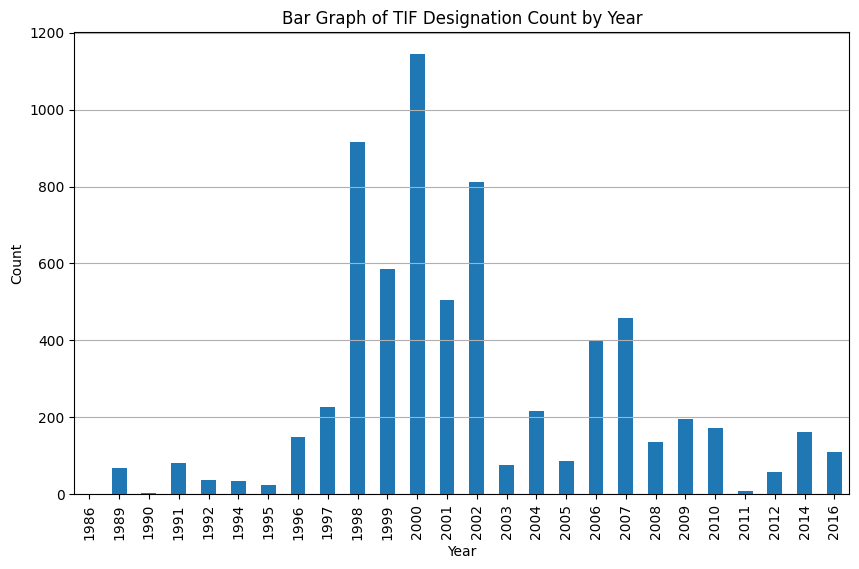

In [9]:
# Bar Graph Visualization looking at the years in which TIF districts from my dataset where designated.

plt.figure(figsize=(10,6))
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Bar Graph of TIF Designation Count by Year')
plt.grid(axis='y')
plt.show()

In [10]:
df.columns

Index(['ref', 'TIF Name', 'Time Period', 'Type', 'Description', 'Amount',
       'Designation Date', 'Expiration Date'],
      dtype='object')

In [11]:
df[df['TIF Name']== 'LaSalle Central']

,ref,TIF Name,Time Period,Type,Description,Amount,Designation Date,Expiration Date
362,T-147,LaSalle Central,2017,Current Obligations,Riverfront Trail - South Branch - implementati...,-344100,2006-11-15,2030-12-31
405,T-147,LaSalle Central,2017,Current Obligations,TIF Works,-2000000,2006-11-15,2030-12-31
535,T-147,LaSalle Central,2017,Current Obligations,Delegate Agencies,-1100,2006-11-15,2030-12-31
543,T-147,LaSalle Central,2017,Current Obligations,Bridge repairs - Lake St,-4600000,2006-11-15,2030-12-31
544,T-147,LaSalle Central,2017,Current Obligations,CTA IGA - Quincy/Wells Station - station impro...,-8133100,2006-11-15,2030-12-31
...,...,...,...,...,...,...,...,...
5930,T-147,LaSalle Central,Fund / Project Balances,Current Obligations,Wacker Dr viaduct utility relocation,-2545100,2006-11-15,2030-12-31
6629,T-147,LaSalle Central,Fund / Project Balances,Fund Balance,Accrued liabilities,6322400,2006-11-15,2030-12-31
6630,T-147,LaSalle Central,Fund / Project Balances,Fund Balance,FY'16 year-end balance,54433800,2006-11-15,2030-12-31
6638,T-147,LaSalle Central,Fund / Project Balances,Fund Balance,Revenue recognition adjustment,-7482600,2006-11-15,2030-12-31


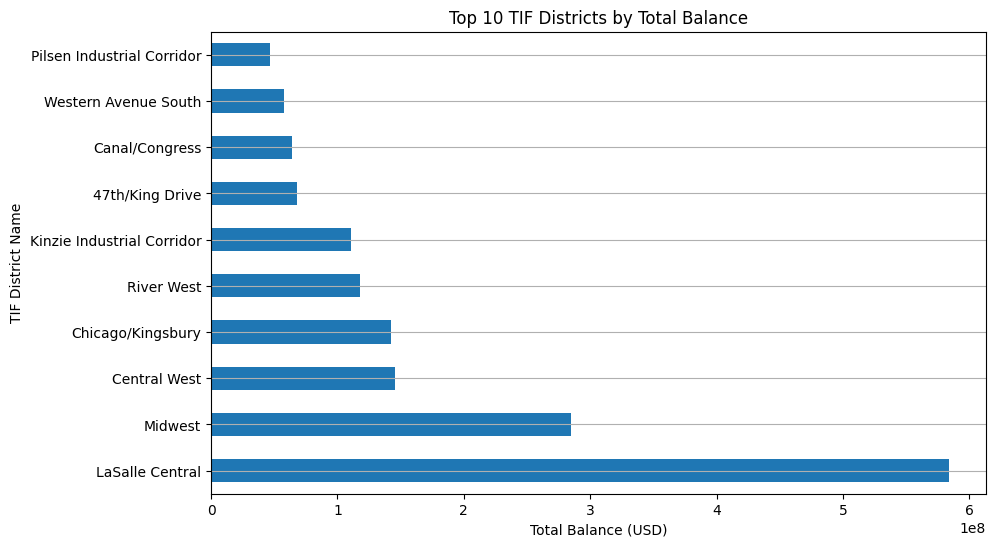

In [19]:
# Bar Graph Visualization looking at the Top 10 TIF Districts with the highest Total amount of money
project_amount_sum = df.groupby('TIF Name')['Amount'].sum()

ten = project_amount_sum.nlargest(10)
plt.figure(figsize=(10, 6))
ten.plot(kind='barh')
plt.xlabel('Total Balance (USD)')
plt.ylabel('TIF District Name')
plt.title('Top 10 TIF Districts by Total Balance')
plt.grid(axis='y')
plt.show()


In [13]:
gdf = gpd.read_file('data/tif_boundaries.geojson')
gdf.head()


,sbif,name,shape_area,show,objectid_1,name_trim,wards_2023,ref,approval_d,objectid,...,shape_leng,comm_area,objectid_2,use,repealed_d,type,shape_le_1,ind,expiration,geometry
0,N,116th/Avenue O,11512032.0441,1,1,116th/Avenue O,10,T-182,10/31/2018,5167,...,22113.6634385,"51,52,55",100,Mixed-use: Comm/Indust/Institut/Parks/Open Space,None,Existing,22113.6634385,Mixed-use,12/31/2042,"MULTIPOLYGON (((-87.53995 41.68459, -87.53995 ..."
1,Y,Bryn Mawr/Broadway,1497351.76204,1,2,Bryn Mawr/Broadway,48,T- 13,11/4/1998,5207,...,10146.7645744,77,38,Mixed-use: Residential/Commercial,None,Existing,10146.7645744,Mixed-use,12/31/2032,"MULTIPOLYGON (((-87.66051 41.98451, -87.66037 ..."
2,N,51st and Lake Park,99810.7553475,1,3,51st and Lake Park,4,T-175,11/15/2012,5185,...,1319.69144432,41,19,Mixed-use: Residential/Commercial/Retail,None,Existing,1319.69144432,Mixed-use,12/31/2036,"MULTIPOLYGON (((-87.58854 41.80155, -87.58902 ..."
3,N,Lakefront,1234864.43789,2,4,Lakefront,4,T-119,3/27/2002,5150,...,7017.57899731,36,34,Residential,None,Existing,7017.57899731,Residential,12/31/2026,"MULTIPOLYGON (((-87.59624 41.81693, -87.59676 ..."
4,N,Madden/Wells,5460412.60763,2,5,Madden/Wells,4,T-126,11/6/2002,0,...,12134.5933039,"35,36,38",129,Residential,None,Existing,12134.5933039,Residential,12/31/2038,"MULTIPOLYGON (((-87.61454 41.82808, -87.61455 ..."


In [14]:
merged_df = gdf.merge(df, on='ref', how='right')
merged_gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

In [15]:
gdf.columns

Index(['sbif', 'name', 'shape_area', 'show', 'objectid_1', 'name_trim',
       'wards_2023', 'ref', 'approval_d', 'objectid', 'fid_1', 'shape_leng',
       'comm_area', 'objectid_2', 'use', 'repealed_d', 'type', 'shape_le_1',
       'ind', 'expiration', 'geometry'],
      dtype='object')

In [16]:
merged_gdf.columns

Index(['sbif', 'name', 'shape_area', 'show', 'objectid_1', 'name_trim',
       'wards_2023', 'ref', 'approval_d', 'objectid', 'fid_1', 'shape_leng',
       'comm_area', 'objectid_2', 'use', 'repealed_d', 'type', 'shape_le_1',
       'ind', 'expiration', 'geometry', 'TIF Name', 'Time Period', 'Type',
       'Description', 'Amount', 'Designation Date', 'Expiration Date'],
      dtype='object')

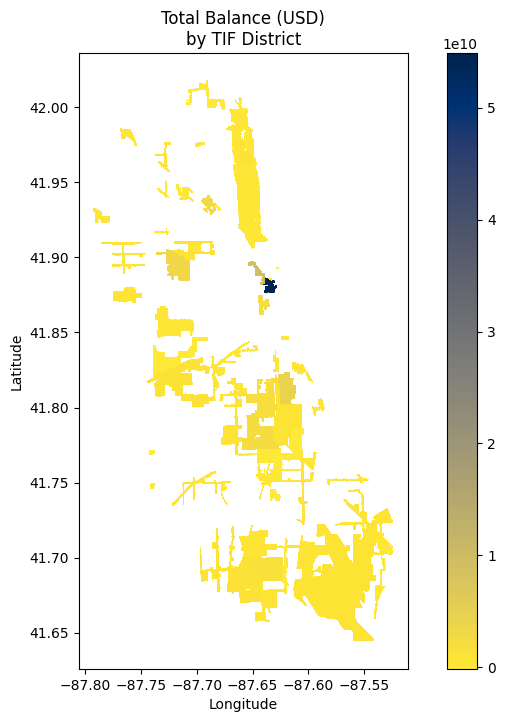

In [18]:
# For this Visualization, I wanted to map the Total Sum of Current existing TIF Districts. 
# The dataset, tif.csv, contains the usage of the tif districts within the span, with includes their rise and expiration.
# This visualization looks at the sum, to show only the existing tif districts and the top projects with the most funding.

merged_gdf = merged_gdf.dropna(subset=['Amount'])
total_amount_by_ref = merged_gdf.groupby('ref')['Amount'].sum().reset_index()
merged_gdf = merged_gdf[['ref', 'geometry']].merge(total_amount_by_ref, on='ref')

fig, ax = plt.subplots(figsize=(10, 8))
merged_gdf.plot(column='Amount', cmap='cividis_r', legend=True, ax=ax)
plt.title('Total Balance (USD)\nby TIF District')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
